In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## All-powerful finite difference calculator

Write a code which computes a finite difference approximation of $u^{(k)}(x)$ based on the values of $\{u(x \pm nh)\}_{n=-N}^{M}$. Use the Vandermonde's system.

In [2]:
N = 0
M = 2 * np.pi

In [3]:
h = np.pi / 10

In [4]:
stencil = np.arange(N, M, h)

In [6]:
y = lambda x : np.sin(x)

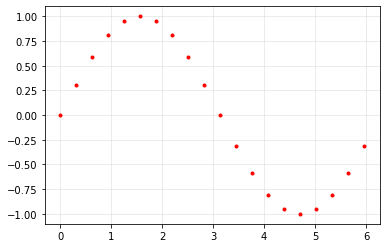

In [7]:
# Plotting the stencil
plt.plot(stencil, y(stencil), 'r.')
plt.grid(alpha=0.3)
plt.show()

Let's set the order of derivative:

In [8]:
k = 3

And the point for which we want to know the value of function

In [9]:
x = np.pi

In [11]:
b = np.zeros(20)
b[k] = 1
b

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [12]:
tmp = stencil - x
tmp

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339])

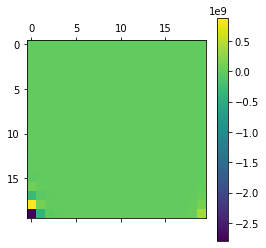

In [17]:
V = np.vander(tmp, len(tmp), increasing=True).T
plt.matshow(V)
plt.colorbar()
plt.show()

In [30]:
factors = scipy.special.factorial(np.arange(len(tmp)))
factors

array([1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 6.00000000e+00,
       2.40000000e+01, 1.20000000e+02, 7.20000000e+02, 5.04000000e+03,
       4.03200000e+04, 3.62880000e+05, 3.62880000e+06, 3.99168000e+07,
       4.79001600e+08, 6.22702080e+09, 8.71782912e+10, 1.30767437e+12,
       2.09227899e+13, 3.55687428e+14, 6.40237371e+15, 1.21645100e+17])

In [37]:
M = np.array([factors for _ in range(len(factors))])
M = 1 / M

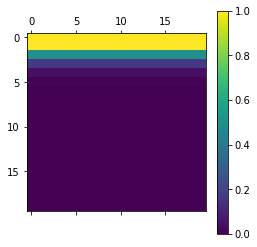

In [39]:
plt.matshow(M.T)
plt.colorbar()
plt.show()

In [42]:
A = V * M

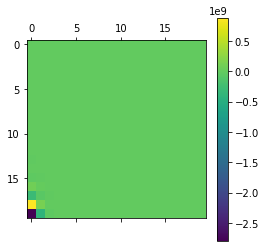

In [47]:
plt.matshow(A)
plt.colorbar()
plt.show()

In [54]:
c1 = np.dot(np.linalg.inv(A).T, b)
c2 = np.dot(np.linalg.inv(A), b)

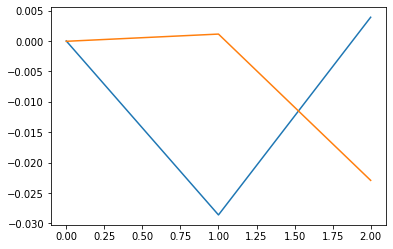

In [57]:
plt.plot(c1[:3])
plt.plot(c2[:3])

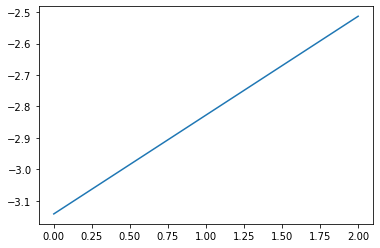

In [59]:
plt.plot(tmp[:3])

In [ ]:
s1 = np.dot(c1, np.power(tmp, np.arange(0, len(tmp))))
s2 = np.dot(c2, np.power(tmp, np.arange(0, len(tmp))))

In [ ]:
ans = np.sin(0) * s1 + np.cos(0) * s1
ans